In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [106]:
df=pd.read_csv("Disease_symptom_and_patient_profile_dataset.csv")

In [107]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [108]:
cols_to_encoded=["Fever","Cough","Fatigue","Difficulty Breathing","Gender"]

<Axes: xlabel='Age', ylabel='Density'>

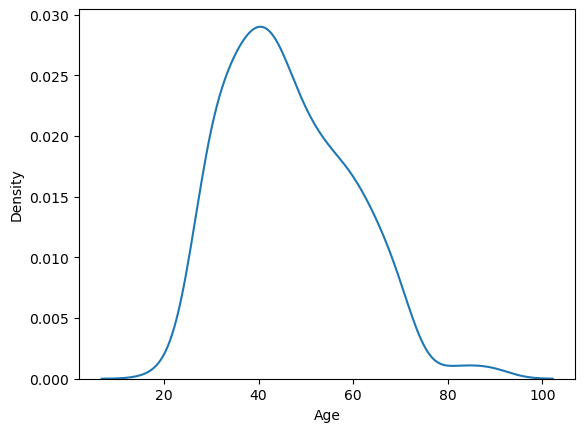

In [109]:
sns.kdeplot(df["Age"])

<Axes: ylabel='Age'>

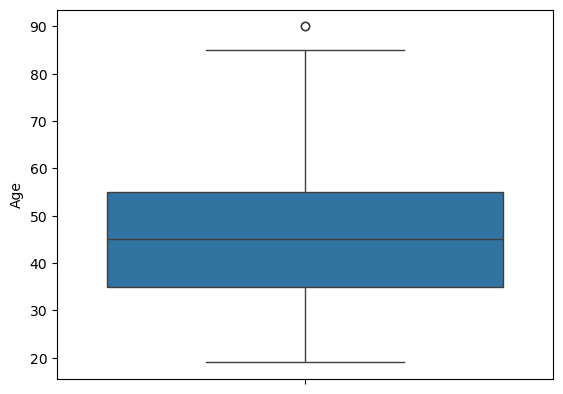

In [110]:
sns.boxplot(df["Age"])

<Axes: xlabel='Age', ylabel='Count'>

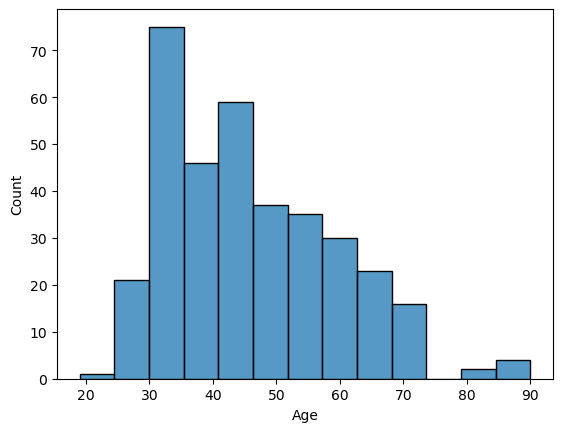

In [111]:
sns.histplot(df["Age"])

In [112]:
df.sample(5)

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
216,Hypothyroidism,Yes,Yes,Yes,No,50,Male,Normal,High,Negative
304,Bladder Cancer,No,No,Yes,No,65,Male,Normal,Normal,Negative
20,Stroke,Yes,Yes,Yes,Yes,29,Female,Normal,Normal,Positive
251,Liver Disease,No,Yes,Yes,No,55,Male,High,Low,Negative
235,Pancreatic Cancer,No,No,Yes,No,50,Female,High,High,Positive


# one hot encoding

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
from sklearn.preprocessing import OneHotEncoder

In [115]:
ohe=OneHotEncoder(drop="first",dtype=np.int32)

In [116]:
hoted=ohe.fit_transform(df[["Fever","Cough","Fatigue","Difficulty Breathing","Gender"]]).toarray()

In [61]:
hoted

array([[1., 0., 1., 1., 0.],
       [0., 1., 1., 0., 0.],
       [0., 1., 1., 0., 0.],
       ...,
       [1., 0., 1., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 1., 0., 0.]])

In [117]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [62]:
#df=np.hstack((df[["Disease","Age","Blood Pressure","Cholesterol Level","Outcome Variable"]].values,hoted))

In [118]:
new_column_names = ohe.get_feature_names_out(["Fever","Cough","Fatigue","Difficulty Breathing","Gender"])

In [119]:
new_column_names

array(['Fever_Yes', 'Cough_Yes', 'Fatigue_Yes',
       'Difficulty Breathing_Yes', 'Gender_Male'], dtype=object)

In [120]:
encoded_data=pd.DataFrame(hoted,columns=new_column_names,index=df.index)

In [121]:
df=pd.concat([df.drop(cols_to_encoded,axis=1),encoded_data],axis=1)

In [71]:
print(df["Disease"].value_counts())

Disease
Asthma               23
Stroke               16
Osteoporosis         14
Diabetes             10
Hypertension         10
                     ..
Schizophrenia         1
Gout                  1
Testicular Cancer     1
Tonsillitis           1
Williams Syndrome     1
Name: count, Length: 116, dtype: int64


In [122]:
df.head()

,Disease,Age,Blood Pressure,Cholesterol Level,Outcome Variable,Fever_Yes,Cough_Yes,Fatigue_Yes,Difficulty Breathing_Yes,Gender_Male
0,Influenza,19,Low,Normal,Positive,1,0,1,1,0
1,Common Cold,25,Normal,Normal,Negative,0,1,1,0,0
2,Eczema,25,Normal,Normal,Negative,0,1,1,0,0
3,Asthma,25,Normal,Normal,Positive,1,1,0,1,1
4,Asthma,25,Normal,Normal,Positive,1,1,0,1,1


# ordinal encoding

In [74]:
from sklearn .preprocessing import OneHotEncoder

In [123]:
oe=OneHotEncoder(sparse_output=False,drop="first",dtype=np.int32)

In [124]:
encoded=oe.fit_transform(df[["Blood Pressure","Cholesterol Level"]])

In [125]:
columns_to_encoded=["Blood Pressure","Cholesterol Level"]

In [126]:
new_column_names = oe.get_feature_names_out(["Blood Pressure","Cholesterol Level"])

In [127]:
new_column_names

array(['Blood Pressure_Low', 'Blood Pressure_Normal',
       'Cholesterol Level_Low', 'Cholesterol Level_Normal'], dtype=object)

In [128]:
encoded=pd.DataFrame(encoded,columns=new_column_names,index=df.index)

In [129]:
encoded.head()

,Blood Pressure_Low,Blood Pressure_Normal,Cholesterol Level_Low,Cholesterol Level_Normal
0,1,0,0,1
1,0,1,0,1
2,0,1,0,1
3,0,1,0,1
4,0,1,0,1


In [130]:
df=pd.concat([df.drop(columns_to_encoded,axis=1),encoded],axis=1)

In [131]:
df.head()

,Disease,Age,Outcome Variable,Fever_Yes,Cough_Yes,Fatigue_Yes,Difficulty Breathing_Yes,Gender_Male,Blood Pressure_Low,Blood Pressure_Normal,Cholesterol Level_Low,Cholesterol Level_Normal
0,Influenza,19,Positive,1,0,1,1,0,1,0,0,1
1,Common Cold,25,Negative,0,1,1,0,0,0,1,0,1
2,Eczema,25,Negative,0,1,1,0,0,0,1,0,1
3,Asthma,25,Positive,1,1,0,1,1,0,1,0,1
4,Asthma,25,Positive,1,1,0,1,1,0,1,0,1


# label encoding

In [147]:
from sklearn.preprocessing import LabelEncoder

In [148]:
le=LabelEncoder()

In [149]:
df["Outcome Variable"]=le.fit_transform(df["Outcome Variable"])

In [150]:
df.head()

,Disease,Age,Outcome Variable,Fever_Yes,Cough_Yes,Fatigue_Yes,Difficulty Breathing_Yes,Gender_Male,Blood Pressure_Low,Blood Pressure_Normal,Cholesterol Level_Low,Cholesterol Level_Normal
0,Influenza,19,1,1,0,1,1,0,1,0,0,1
1,Common Cold,25,0,0,1,1,0,0,0,1,0,1
2,Eczema,25,0,0,1,1,0,0,0,1,0,1
3,Asthma,25,1,1,1,0,1,1,0,1,0,1
4,Asthma,25,1,1,1,0,1,1,0,1,0,1


# univaret analysis

<Axes: xlabel='Gender_Male', ylabel='count'>

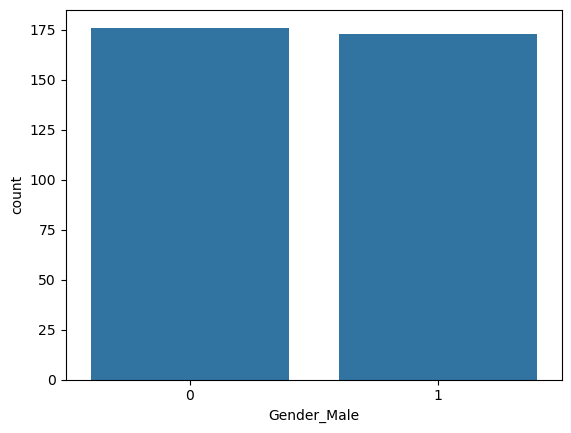

In [135]:
sns.countplot(x=df["Gender_Male"])

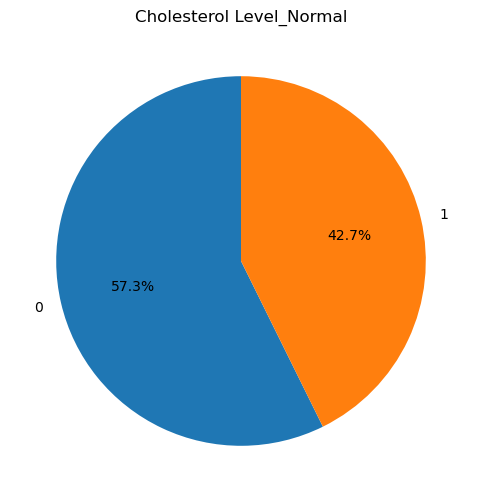

In [138]:
# Count values
counts = df["Cholesterol Level_Normal"].value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Cholesterol Level_Normal")
plt.show()

# bivarite and multi variate analysis

In [151]:
df.head()

,Disease,Age,Outcome Variable,Fever_Yes,Cough_Yes,Fatigue_Yes,Difficulty Breathing_Yes,Gender_Male,Blood Pressure_Low,Blood Pressure_Normal,Cholesterol Level_Low,Cholesterol Level_Normal
0,Influenza,19,1,1,0,1,1,0,1,0,0,1
1,Common Cold,25,0,0,1,1,0,0,0,1,0,1
2,Eczema,25,0,0,1,1,0,0,0,1,0,1
3,Asthma,25,1,1,1,0,1,1,0,1,0,1
4,Asthma,25,1,1,1,0,1,1,0,1,0,1


<Axes: xlabel='Age', ylabel='Gender_Male'>

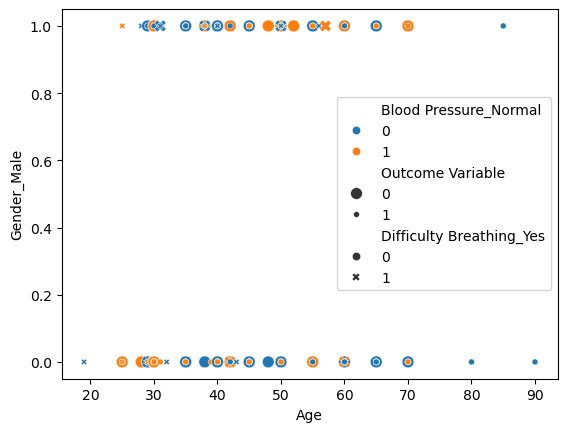

In [153]:
sns.scatterplot(x=df["Age"],y=df["Gender_Male"],hue=df["Blood Pressure_Normal"],style=df["Difficulty Breathing_Yes"],size=df["Outcome Variable"])

<Axes: xlabel='Cholesterol Level_Normal', ylabel='Blood Pressure_Normal'>

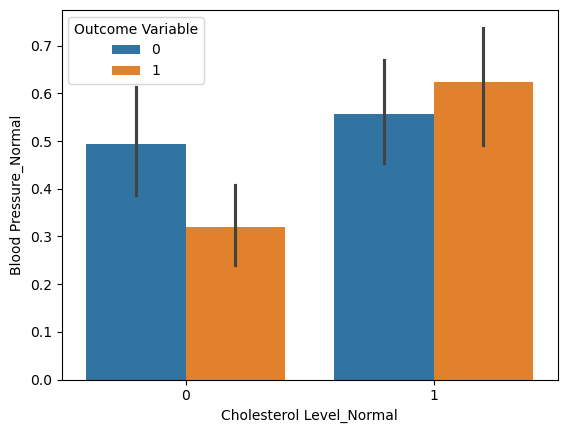

In [155]:
sns.barplot(x=df["Cholesterol Level_Normal"],y=df["Blood Pressure_Normal"],hue=df["Outcome Variable"])

<Axes: xlabel='Difficulty Breathing_Yes', ylabel='Age'>

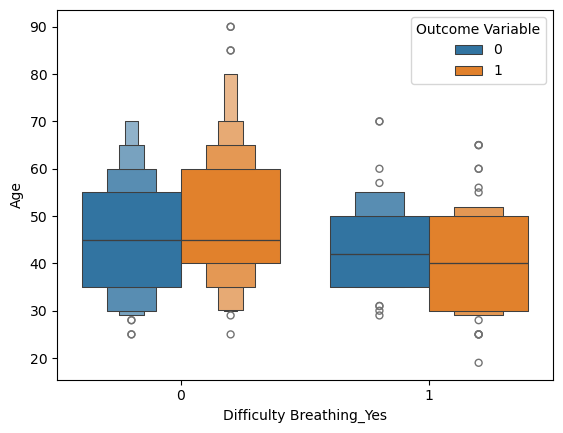

In [161]:
sns.boxenplot(x=df["Difficulty Breathing_Yes"],y=df["Age"],hue=df["Outcome Variable"])

In [163]:
df.to_csv("encoded.csv")

In [164]:
df.head()

,Disease,Age,Outcome Variable,Fever_Yes,Cough_Yes,Fatigue_Yes,Difficulty Breathing_Yes,Gender_Male,Blood Pressure_Low,Blood Pressure_Normal,Cholesterol Level_Low,Cholesterol Level_Normal
0,Influenza,19,1,1,0,1,1,0,1,0,0,1
1,Common Cold,25,0,0,1,1,0,0,0,1,0,1
2,Eczema,25,0,0,1,1,0,0,0,1,0,1
3,Asthma,25,1,1,1,0,1,1,0,1,0,1
4,Asthma,25,1,1,1,0,1,1,0,1,0,1


<Axes: xlabel='Outcome Variable', ylabel='Gender_Male'>

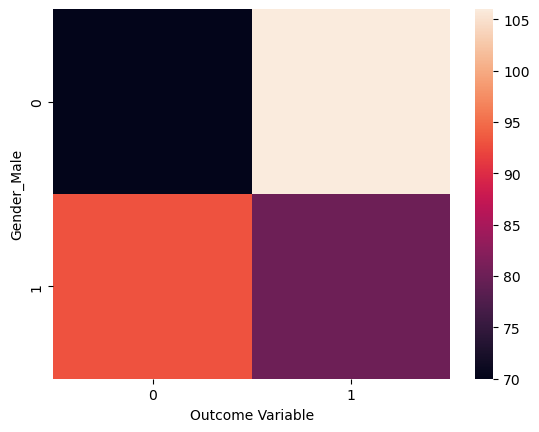

In [167]:
sns.heatmap(pd.crosstab(df["Gender_Male"],df["Outcome Variable"]))

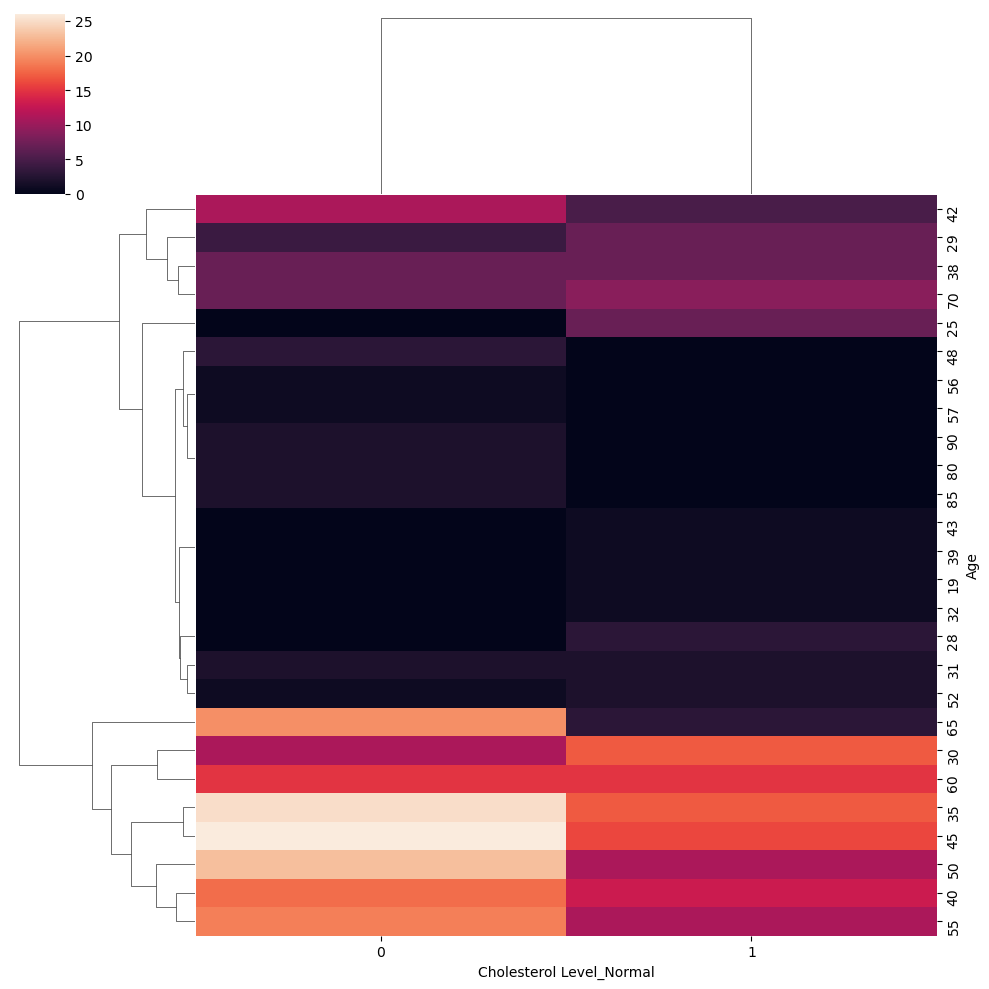

In [168]:
sns.clustermap(pd.crosstab(df["Age"],df["Cholesterol Level_Normal"]))

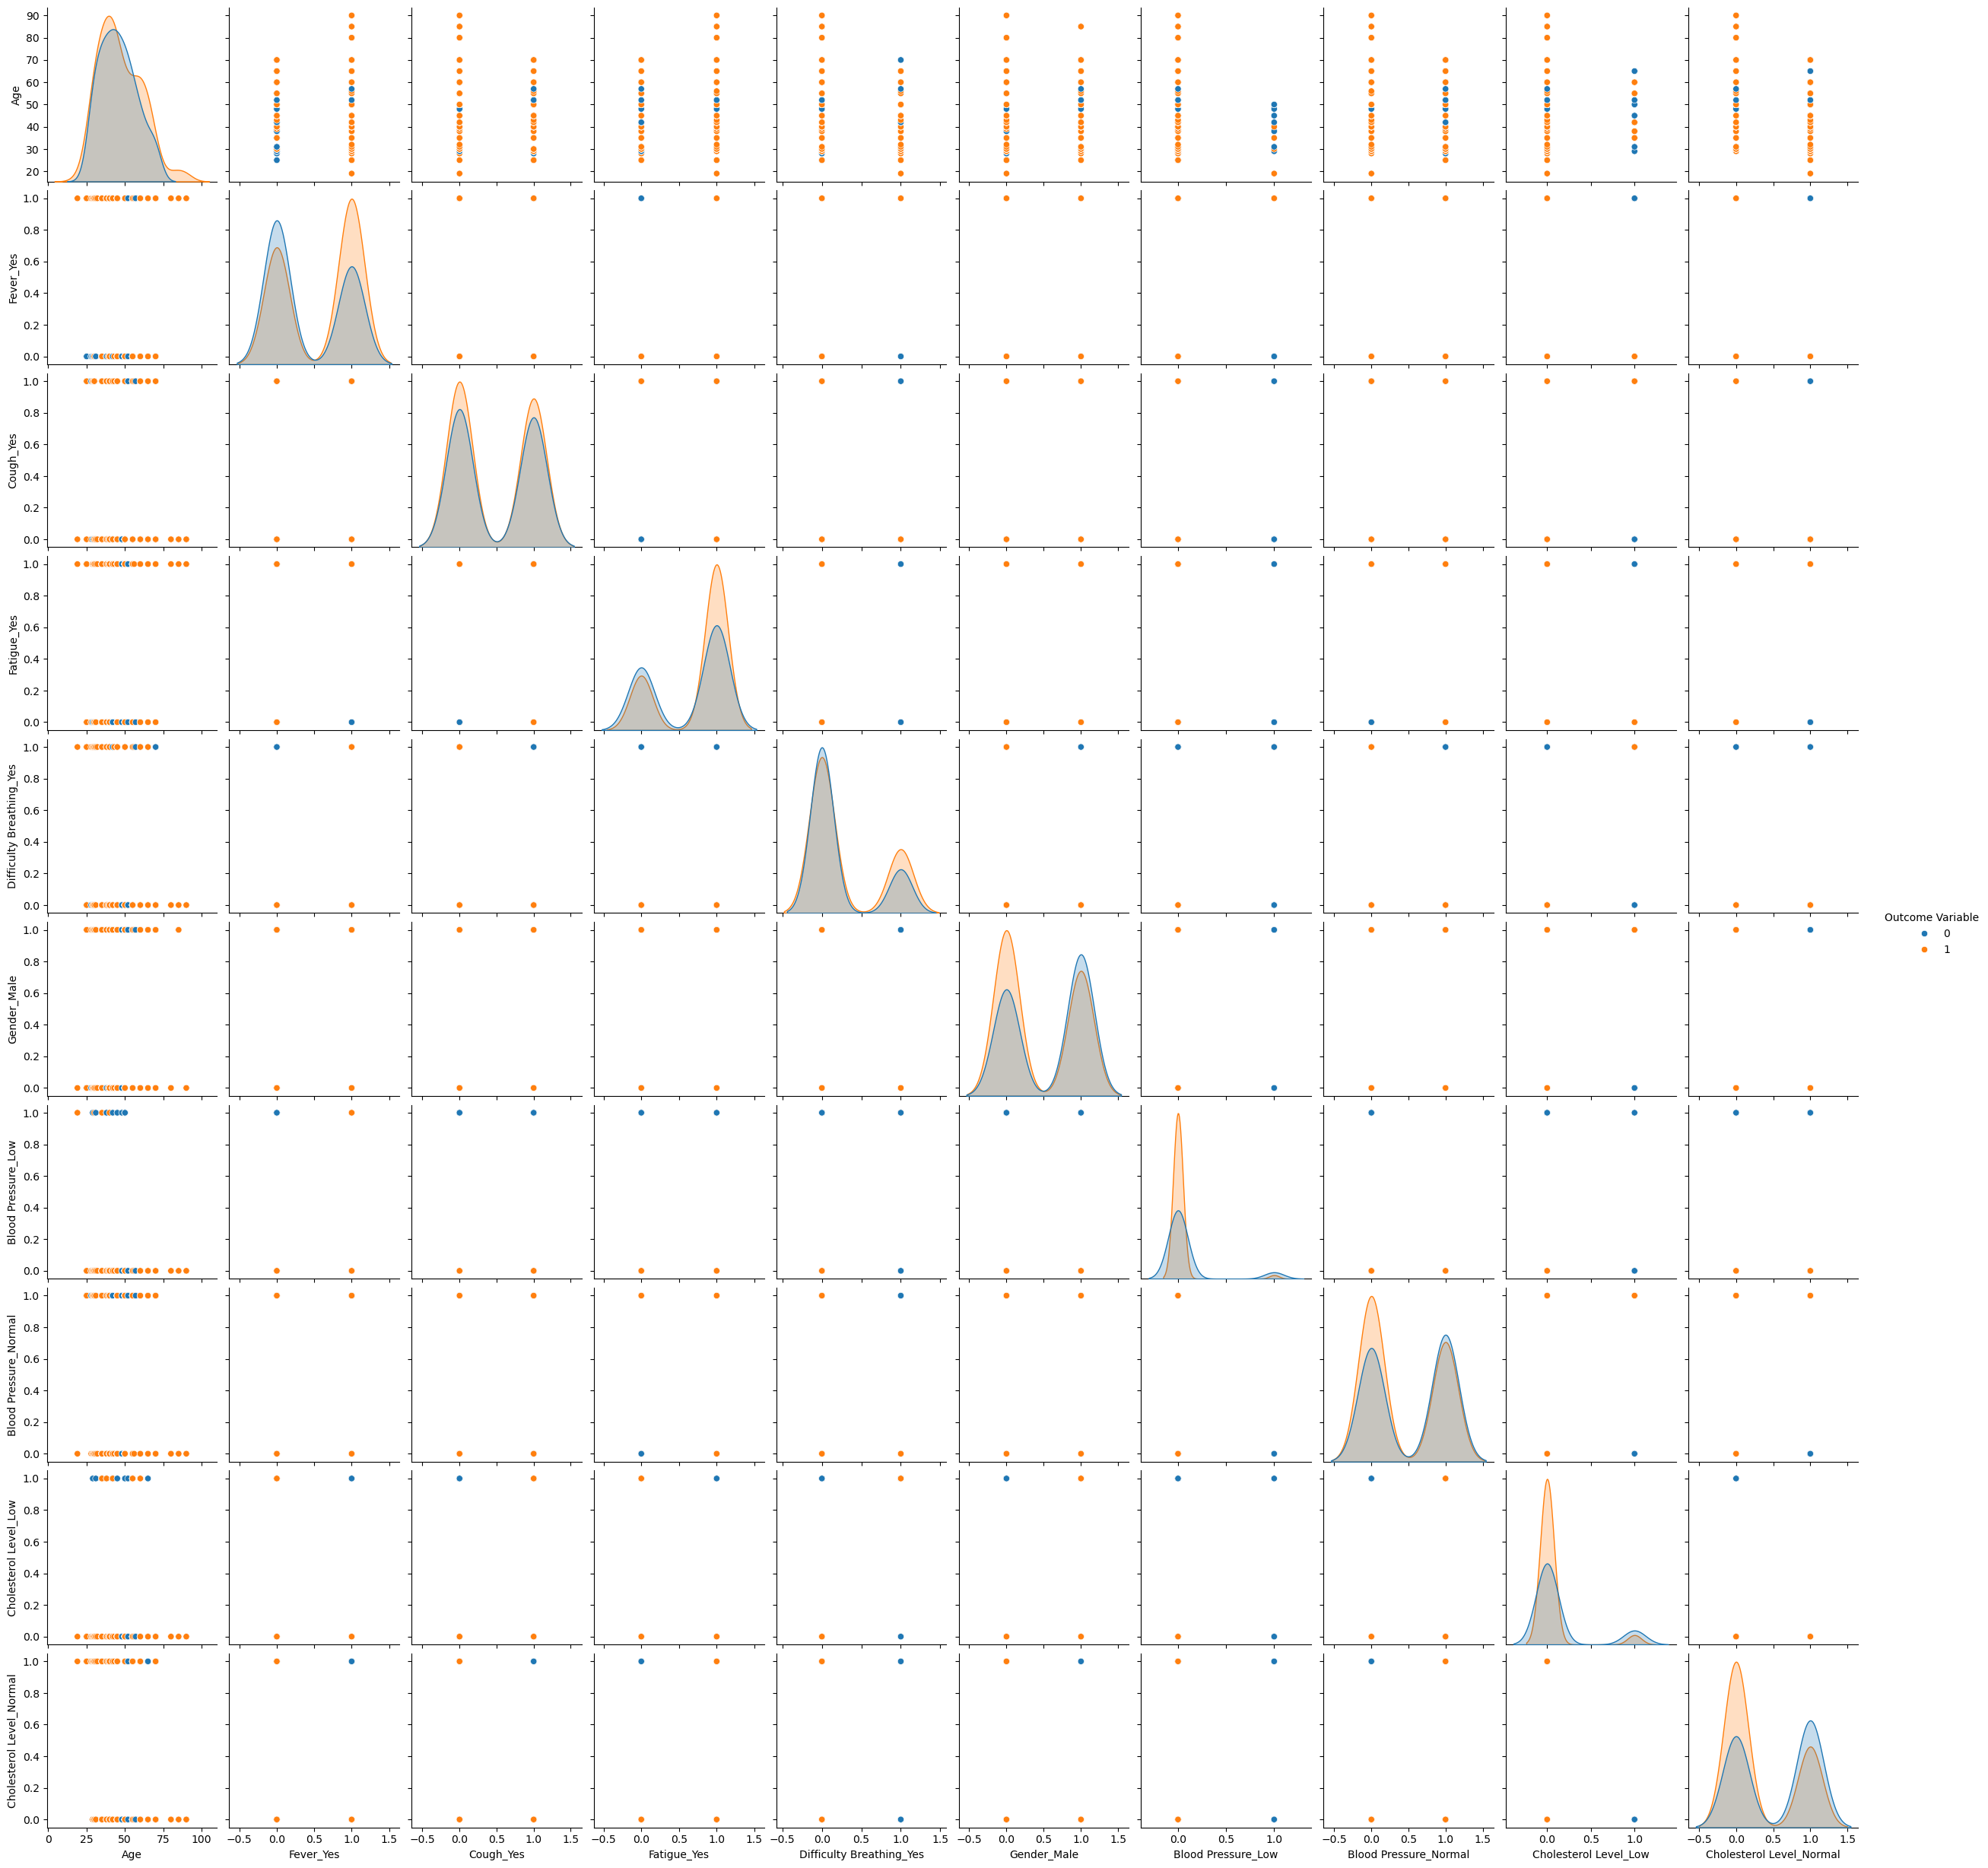

In [169]:
sns.pairplot(df,hue="Outcome Variable")